NAME:BIDISHA CHANDA


TASK:PREDICTION USING SUPERVISED ML

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = r"http://bit.ly/w-data"
df  = pd.read_csv(path)

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
df.shape

(25, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


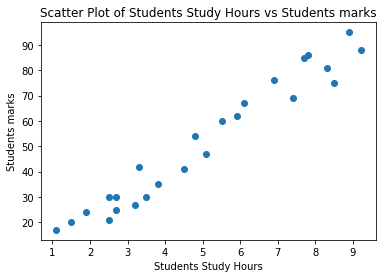

In [9]:
plt.scatter(x =df.Hours, y = df.Scores)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")
plt.show()

DATA CLEANING

In [10]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [11]:
df.mean()

Hours      5.012
Scores    51.480
dtype: float64

In [12]:
df2 = df.fillna(df.mean())

In [13]:
df2.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [14]:
df2.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


SPLITTING OF DATASET

In [15]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (25, 1)
shape of y =  (25,)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (20, 1)
shape of y_train =  (20,)
shape of X_test =  (5, 1)
shape of y_test =  (5,)


  y = m * x + c


In [17]:
 from sklearn.linear_model import LinearRegression
 lr = LinearRegression()

In [18]:
lr.fit(X_train,y_train)

LinearRegression()

In [19]:
lr.coef_

array([9.56433743])

In [20]:
lr.intercept_

2.701970681675263

In [21]:
m = 3.93
c = 50.44
y  = m * 4 + c 
y

66.16

In [22]:
y_pred  = lr.predict(X_test)
y_pred

array([55.30582657, 76.34736893, 68.69589898, 82.08597139, 28.52568176])

In [23]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,5.5,60.0,55.305827
1,7.7,85.0,76.347369
2,6.9,76.0,68.695899
3,8.3,81.0,82.085971
4,2.7,30.0,28.525682


In [24]:
lr.score(X_test,y_test)

0.9238518102278777

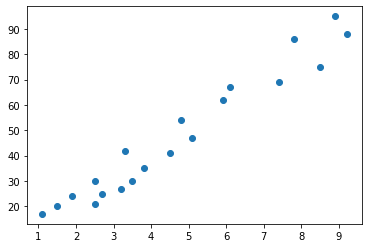

In [25]:
plt.scatter(X_train,y_train)

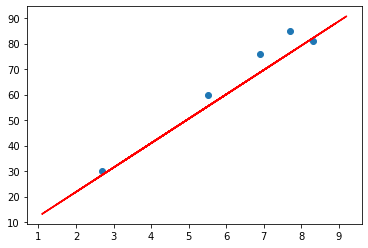

In [26]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")

In [27]:
hours =[[9.25]]
own_pred = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 91.1720919543937


MODEL EVALUATION

In [28]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.6422390298182545


SAVING THE MODEL

In [29]:
import joblib
joblib.dump(lr, "student_mark_predictor.pkl")

['student_mark_predictor.pkl']

In [30]:
model = joblib.load("student_mark_predictor.pkl")